In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load sales data

In [4]:
sales = pd.read_csv('./data/home_data.csv')
sales.date = pd.to_datetime(sales.date.str[:8])

In [5]:
sales.head()

id       date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13  221900         3       1.00         1180      5650   
1  6414100192 2014-12-09  538000         3       2.25         2570      7242   
2  5631500400 2015-02-25  180000         2       1.00          770     10000   
3  2487200875 2014-12-09  604000         4       3.00         1960      5000   
4  1954400510 2015-02-18  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.5 MB


## Selection and summary statistics

In [7]:
(
    sales.
    filter(items=['zipcode', 'price']).
    groupby('zipcode').
    mean().
    sort_values(by='price', ascending=False).
    iloc[0,:]
)

price    2160606.6
Name: 98039, dtype: float64

## Filtering data

In [8]:
(
    sales.
    filter(items=['sqft_living']).
    loc[(sales.sqft_living > 2000) & (sales.sqft_living < 4000)]    
).shape[0] / sales.shape[0]

0.4215518437977143

## Exploring the data for housing sales

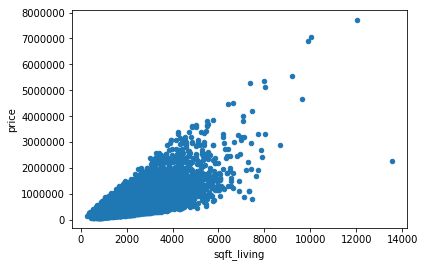

In [9]:
sales.plot.scatter(x='sqft_living', y='price')
pass

## Simple regression model of `sqrt_living` to `price`

In [10]:
X_Tr, X_Te, y_Tr, y_Te = train_test_split(sales.iloc[:,3:], sales.price, 
                                          test_size=0.2, random_state=0)

In [11]:
fit_slm = LinearRegression().fit(X_Tr[['sqft_living']], y_Tr)

In [12]:
fit_slm.intercept_, fit_slm.coef_[0]

(-48257.06345556211, 283.96855736791895)

In [13]:
yhat_Te = fit_slm.predict(X_Te[['sqft_living']])

In [14]:
np.sqrt(mean_squared_error(y_Te, yhat_Te))

248879.06143647007

## Explore other features in the data

In [15]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
[f in sales.columns for f in my_features]

[True, True, True, True, True, True]

In [16]:
sales[my_features].describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

            zipcode  
count  21613.000000  
mean   98077.939805  
std       53.505026  
min    98001.000000  
25%    98033.000000  
50%    98065.000000  
75%    98118.000000  
max    98199.000000

## Build a regression model with more features

In [17]:
fit_lm = LinearRegression().fit(X=X_Tr[my_features], y=y_Tr)

In [18]:
np.r_[fit_lm.intercept_, fit_lm.coef_]

array([-6.05582590e+07, -5.66006330e+04,  1.10870936e+04,  3.20408369e+02,
       -2.89499140e-01, -2.41800491e+03,  6.17971071e+02])

In [19]:
yhat_Te = fit_lm.predict(X_Te[my_features])

In [20]:
RMSE1 = np.sqrt(mean_squared_error(y_Te, yhat_Te))
RMSE1

244004.77443104205

## Apply the learned model to predict prices of 2 houses

In [21]:
house1 = sales[sales.id == 5309101200]

In [22]:
house1.T

1054
id                      5309101200
date           2014-06-05 00:00:00
price                       620000
bedrooms                         4
bathrooms                     2.25
sqft_living                   2400
sqft_lot                      5350
floors                         1.5
waterfront                       0
view                             0
condition                        4
grade                            7
sqft_above                    1460
sqft_basement                  940
yr_built                      1929
yr_renovated                     0
zipcode                      98117
lat                        47.6763
long                       -122.37
sqft_living15                 1250
sqft_lot15                    4880

In [23]:
fit_slm.predict(house1[['sqft_living']])

array([633267.47422744])

In [24]:
fit_lm.predict(house1[my_features])

array([637556.26515922])

In [25]:
house2 = sales[sales.id == 1925069082]

In [26]:
house2.T

1361
id                      1925069082
date           2015-05-11 00:00:00
price                      2200000
bedrooms                         5
bathrooms                     4.25
sqft_living                   4640
sqft_lot                     22703
floors                           2
waterfront                       1
view                             4
condition                        5
grade                            8
sqft_above                    2860
sqft_basement                 1780
yr_built                      1952
yr_renovated                     0
zipcode                      98052
lat                        47.6393
long                      -122.097
sqft_living15                 3140
sqft_lot15                   14200

<img src="./data/734302_0.jpg">

In [27]:
fit_slm.predict(house2[['sqft_living']])

array([1269357.04273158])

In [28]:
fit_lm.predict(house2[my_features])

array([1274443.76531342])

## Building a regression model with several more features

In [29]:
advanced_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
    'condition',     # condition of house				
    'grade',         # measure of quality of construction				
    'waterfront',    # waterfront property				
    'view',          # type of view				
    'sqft_above',    # square feet above ground				
    'sqft_basement', # square feet in basement				
    'yr_built',      # the year built				
    'yr_renovated',  # the year renovated				
    'lat', 'long',   # the lat-long of the parcel				
    'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
    'sqft_lot15',    # average lot size of 15 nearest neighbors 
]

In [30]:
fit_lm_ad = LinearRegression().fit(X=X_Tr[advanced_features], y=y_Tr)

In [31]:
np.r_[fit_lm_ad.intercept_, fit_lm_ad.coef_]

array([ 4.16613302e+06, -3.46742831e+04,  3.94310007e+04,  1.12610340e+02,
        1.75888737e-01,  7.42456845e+03, -5.67468805e+02,  2.61695183e+04,
        9.35901502e+04,  6.05600529e+05,  5.27368893e+04,  7.27875902e+01,
        3.98227501e+01, -2.60713698e+03,  2.01053038e+01,  6.04865961e+05,
       -2.22392029e+05,  2.42333853e+01, -4.67450072e-01])

In [32]:
yhat_Te = fit_lm_ad.predict(X_Te[advanced_features])

In [33]:
RMSE2 = np.sqrt(mean_squared_error(y_Te, yhat_Te))
RMSE2

190473.37570967907

In [34]:
RMSE1 - RMSE2

53531.39872136299